# Beiwe-visualizer

In [1]:
import os, sys
# Please specify data file path here:
# folder hierarchy: main-path/study-name/user-name/feature-name/[timestamp-sortable].csv or main-path/study-name/user-name/feature-name.csv.gz
# os.main_path = os.getenv('HOME')+''
os.main_path = os.getenv('HOME')+'/projects/beiwe-gitlab/beiwe-visualizer/2.decrypted/'

# disable autosave so that multiple user browser can attach the same notebook
%autosave 0

# enable notebook mode so that we can drag, resize and save plots
%matplotlib notebook

from core import *

Autosave disabled


<IPython.core.display.Javascript object>

In [2]:
HBox([dropdown_studies, fileupload])

# Clinician Dashboard

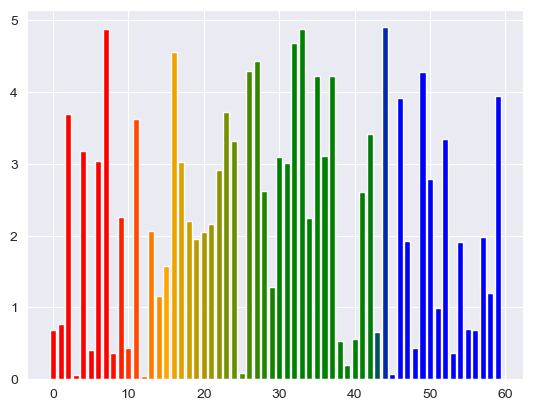

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

plt.switch_backend('module://ipykernel.pylab.backend_inline')
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N = 60
x = np.arange(N).astype(float)
y = np.random.uniform(0, 5, size=(N,))

bb=plt.bar(x,y,color=rvb(x/N))
plt.show()


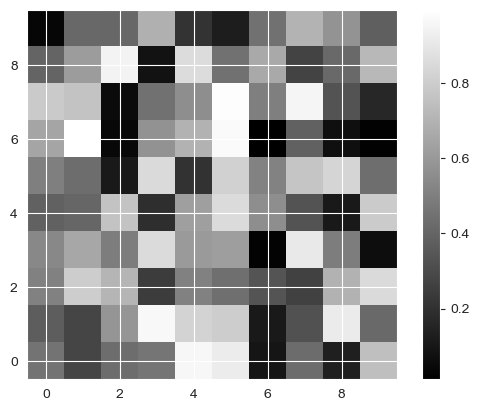

In [4]:
import numpy as np
import matplotlib.pyplot as plt
mat = np.random.random((10,10))
plt.imshow(mat, origin="lower", cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [5]:
def group_dates(data, labels, figsize):
    periods = [(s+'D' if s.isdigit() else s) for s in re.split('[ ,;]+', os.DateGroup)]
    index = data.index if type(data.index) == pd.DatetimeIndex else data.datetime
    max_date = index.max().floor('D')
    cut_points = [max_date]
    for period in periods[::-1]:
        max_date -= pd.to_timedelta(period)
        cut_points = [max_date] + cut_points
    dfg = data.groupby(pd.cut(index, cut_points, right=False))
    figsize[0] = len(periods)*0.4
    if index.nunique()==len(data):
        ret = dfg.mean()
        ret_index = ret.index
    else:
        ret = pd.concat([set_index_to_value(v.reset_index(drop=True), k, 'datetime') for k,v in dfg], ignore_index=True)
        ret_index = [k for k,v in dfg]
    return ret, ret_index, figsize

def drawAll(Username, StartDate, LastDate, DateGroup, DoPlot):
    if not DoPlot:
        clear_output()
        return
    
    PP = None
    if DateGroup:
        os.DateGroup = DateGroup
        PP = group_dates
    
    # init parameters
    file_suffix = '.csv.gz'
    plt.switch_backend('module://ipykernel.pylab.backend_inline')
    
    # arrange into horizontal grid
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=[16,4])
    
    ## 1. sleep
    df = load_df(Username, 'sleep'+file_suffix).copy()
    os.df = df = df[df.Level!='main']
    df.Seconds /= 3600
    # get sleep efficiency
    sleep_efficiency = df.groupby(pd.Grouper(freq='1D', base=0.5))['Efficiency'].mean()
    SE, SE_index, SE_figsize = group_dates(sleep_efficiency, None, [16,9])
    # plot sleep duration together with sleep efficiency
    plot1 = draw(df, StartDate, LastDate, 0.0, False, 'sleep'+file_suffix, 'sum in each interval', '1D', 0.5, 0, 'time chart (bar)', 'Seconds', 'mean',
                 '<entry-count>', False, 'no sort', False, False, False, False, None, post_processor=PP, ax=axs[0], plot_options={'color':'red'}, set_title='Sleep Stage', set_ylabel='hours')
    
#     plot4 = draw(Username, StartDate, LastDate, 0.0, False, 'sleep'+file_suffix, 'mean value in each interval', '1D', 0.5, 0, 'time chart (bar)', 'Efficiency', 10,
#                  '<entry-count>', True, 'no sort', False, False, False, False, None, post_processor=PP, ax=axs[1], set_title='Sleep Efficiency', set_ylabel='%')
    
#     # sleep efficiency
#     plot4 = draw(Username, StartDate, LastDate, 0.0, False, 'sleep'+file_suffix, 'mean value in each interval', '1D', 0.5, 0, 'time chart (bar)', 'Efficiency', 10,
#                  '<entry-count>', True, 'no sort', False, False, False, False, None, post_processor=PP, ax=axs[4], set_title='Sleep Efficiency', set_ylabel='%')
    
    
date_group1 = Text(value='30 7 7', placeholder='Input date group such as "30 7 7"', disabled=False)
W1 = interactive(drawAll, Username = dropdown_userlist, StartDate = DatePicker(value=None), LastDate = DatePicker(value=None), DateGroup = date_group1, DoPlot = ToggleButton(value=False, description='Update Plot'))
VBox([HBox(W1.children[0:-1]), W1.children[-1]])

In [7]:
sleep_efficiency = os.df.groupby(pd.Grouper(freq='1D', base=0.5))['Efficiency'].mean()
SE, SE_index, SE_figsize = group_dates(sleep_efficiency, None, [16,9])
SE

[2019-11-25, 2019-12-25)    95.361285
[2019-12-25, 2020-01-01)    96.629630
[2020-01-01, 2020-01-08)    97.000000
Name: Efficiency, dtype: float64